# vta MC2: Fourier Transformation

In [31]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # for better quality plots

## Aufgabe 1

In dieser Aufgabe implementieren Sie die Berechnung der Fourier-Approximation in numpy (kein fft).

**(a)** Implementieren Sie mit numpy eine Methode zur Berechnung der $k$-ten Fourier-Komponente einer Funktion, gegeben durch Arrays $x$ und $y$, mithilfe der Trapezregel (`np.trapz`).

$${\displaystyle c_{n}={\frac {1}{P}}\int _{-P/2}^{P/2}s(x)e^{-{\frac {2\pi inx}{P}}}\,dx\qquad {\text{for all integers}}~n}$$
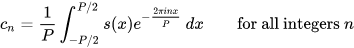

In [32]:
def fourier_coefficient(x, y, k):
    P = 2 * x.max()
    return (1 / P) * np.trapz(y * np.exp(-1j * 2 * np.pi * k * x / P), x)

**(b)** Implementieren Sie mit numpy eine Methode zur Berechnung der Fourier-Approximation $f_{app}$ mit einer gegebenen Anzahl ($2m + 1$) von Fourier-Komponenten.

$${\displaystyle s(x)=\sum _{n=-\infty }^{\infty }c_{n}\cdot e^{\frac {2\pi inx}{P}}}$$
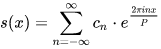

In [33]:
def fourier_approximation(f, a, N, m):
    """
    Computes the Fourier approximation for a function f on an interval [-a,a] (a>0) with 2m+1 components.
    f -- function to approximate
    a -- scale of the function defined on [-a,a]
    N -- number of x-grid points
    m -- parameter specifying the number of Fourier components 2m+1
    returns x,y,yappr,coeff (x-grid, function values on x-grid, approximate function values on x-grid, Fourier coefficients)
    """
    if a <= 0:
        raise Exception("'a' must be positive")

    x = np.linspace(-a, a, N)
    y = f(x)

    P = 2 * a
    f_approx = np.array([fourier_coefficient(x, y, k) * np.exp(1j * 2 * np.pi * k * x / P) for k in range(-m, m + 1)])
    f_approx = np.sum(f_approx, axis=0)

    return x, y, f_approx.real

**(c)** Nähern Sie die Funktion $f_1(x) = \frac{1}{{e^x + e^{-x}}}$ auf dem Intervall $[-3, 3]$ (Auflösung: $N = 600$ Schritte) mit verschiedenen Anzahlen von Komponenten $2m + 1$. Plotten Sie den Vergleich zur Originalfunktion $f$.

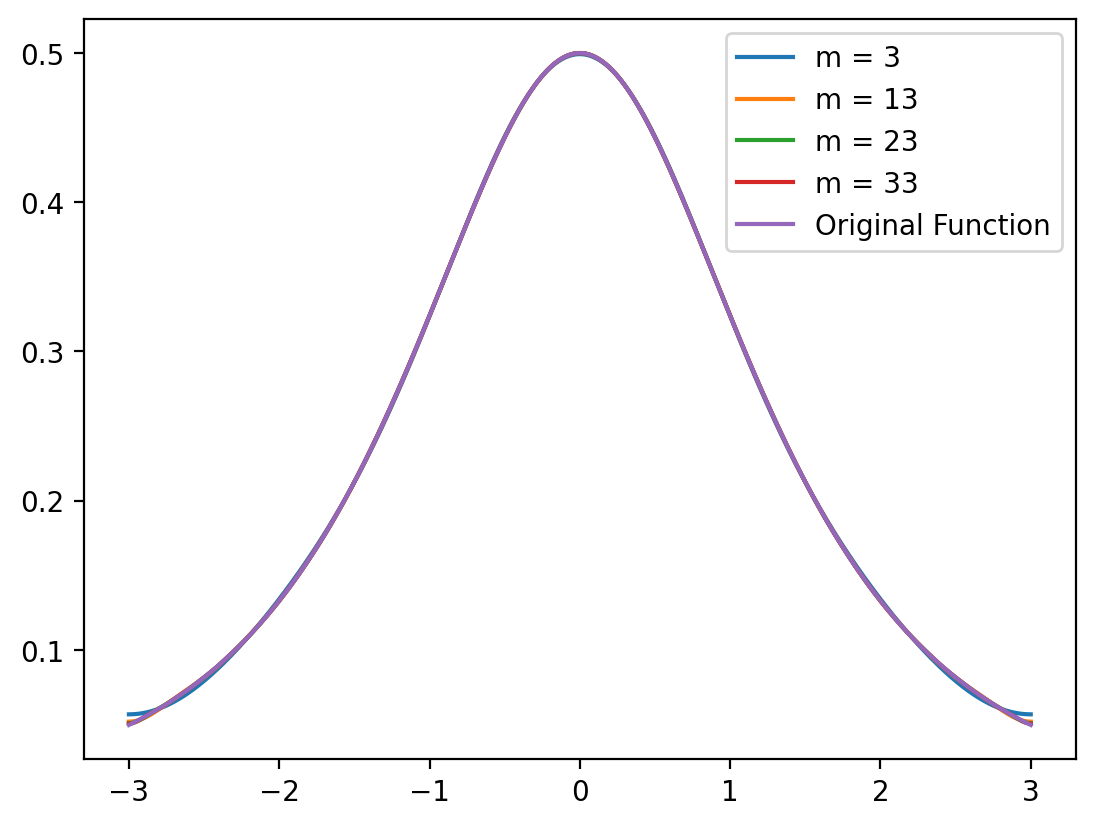

In [34]:
def f1(x): 
    return  1 / (np.exp(x) + np.exp(-x))

m_values = [2*m + 1 for m in range(1, 20, 5)]

for m in m_values:
    x, y, f_app = fourier_approximation(f=f1, a=3, N=600, m=m)
    plt.plot(x, f_app, label=f'm = {m}')

# Plot the original function
plt.plot(x, y, label='Original Function')

plt.legend()
plt.show()

**(d)** Bestimmen Sie die Anzahl der Fourier-Komponenten, die benötigt werden, um eine Approximation mit höchstens $0,1$% relativen Fehler zu erhalten.


$$
\delta=\left|\frac{v_A-v_E}{v_E}\right| \cdot 100 \%
$$

In [35]:
def relative_error_1(y_true, y_approx):
    return np.abs(y_true - y_approx).max() / np.abs(y_true).max()

def relative_error_2(y_true, y_approx):
    return np.linalg.norm((y_true - y_approx)) / np.linalg.norm(y_true)

def relative_error_3(y_true, y_approx):
    return np.sqrt(np.mean((y_true - y_approx) ** 2)) / np.sqrt(np.mean(y_true ** 2))

In [36]:
a = 3

re_1, re_2, re_3 = [1],[1],[1]
errors = [re_1, re_2, re_3]
re_f = [relative_error_1, relative_error_2, relative_error_3]

for i, e_f in enumerate(re_f):
    print(f"Running e_f: {i+1}")
    for m in range(2, 30):
        _, _, f1_approx = fourier_approximation(f=f1, a=3, N=600, m=2*m + 1)
        error = e_f(f1(x), f1_approx)
        errors[i].append(error)

        if error <= 0.001:
            print(f'Number of Fourier components needed: {m}')
            break

    print()

Running e_f: 1
Number of Fourier components needed: 29

Running e_f: 2
Number of Fourier components needed: 6

Running e_f: 3
Number of Fourier components needed: 6



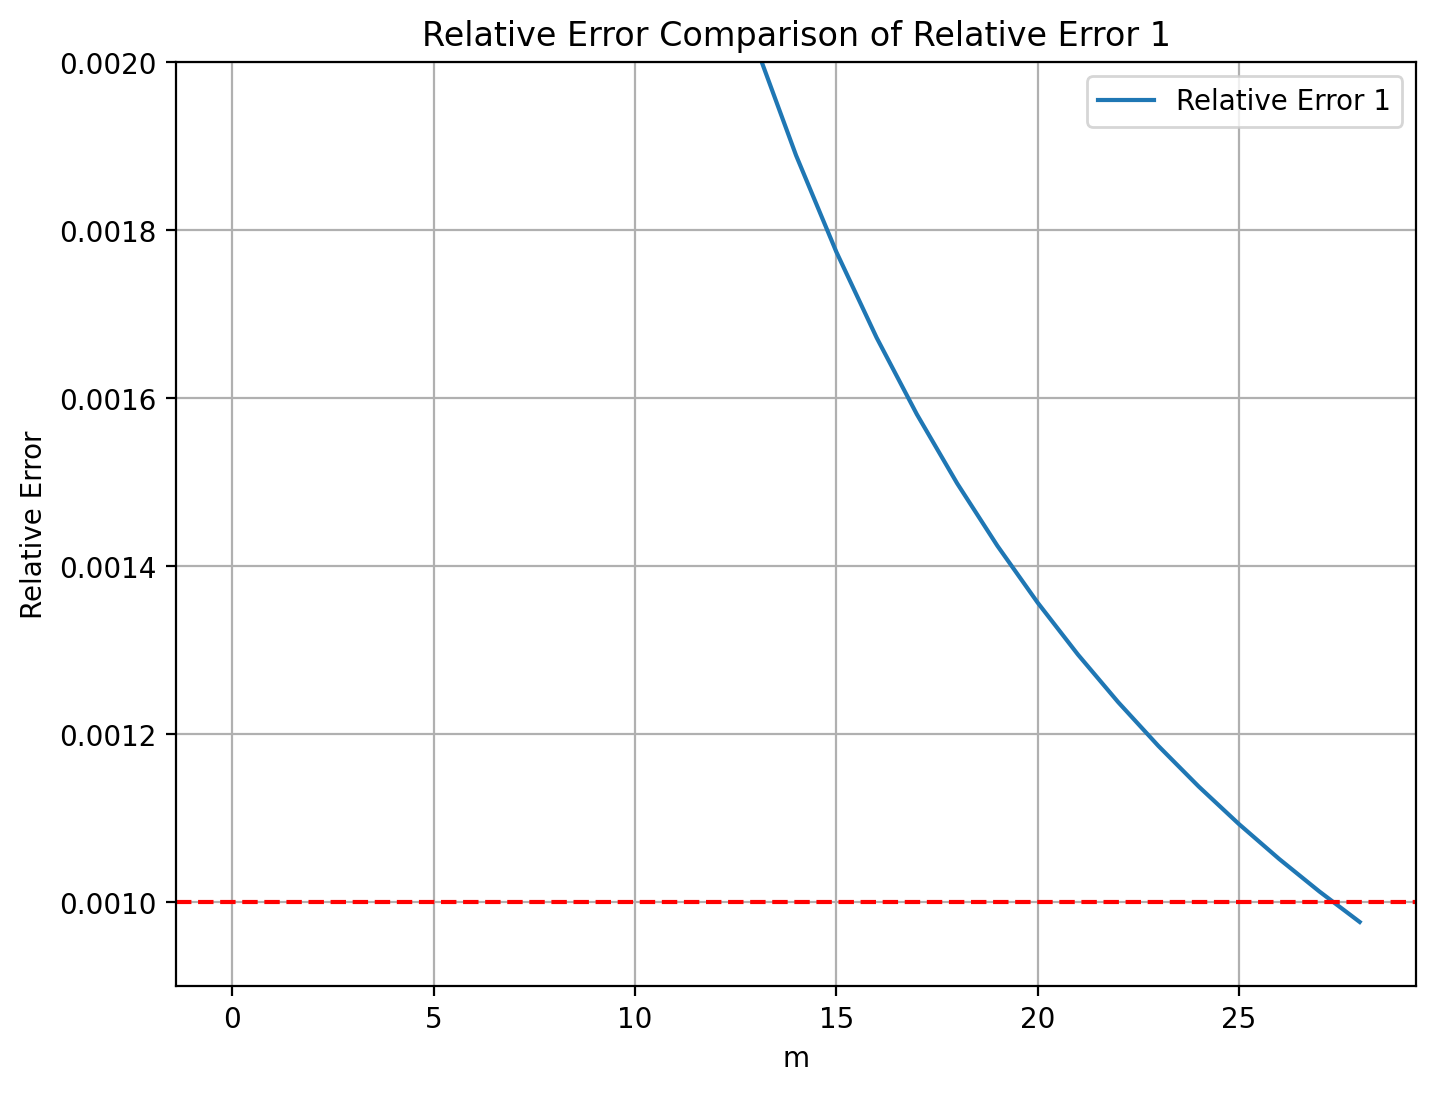

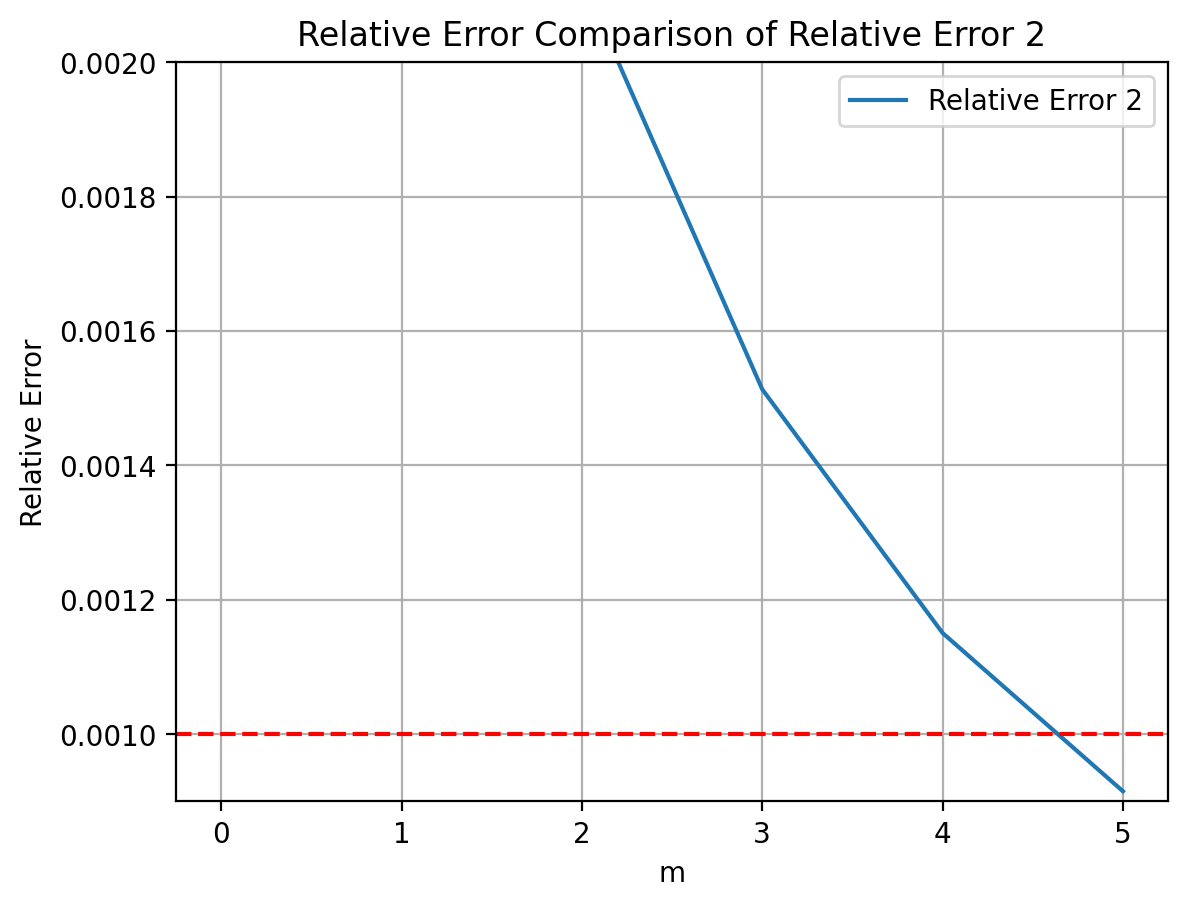

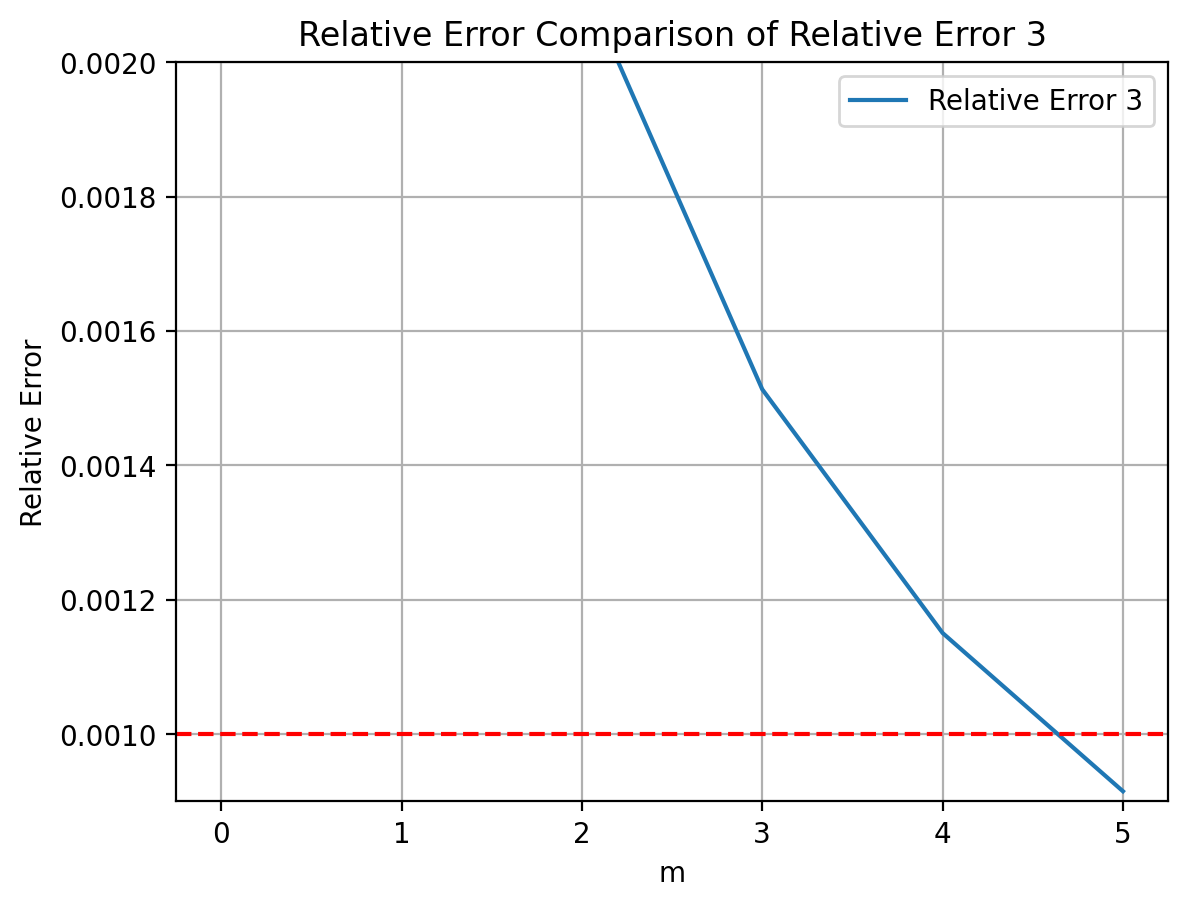

In [37]:
plt.figure(figsize=(8, 6))
for i, error in enumerate(errors):
    plt.plot(range(len(error)), error, label=f'Relative Error {i+1}')

    # Adding labels and a legend
    plt.xlabel('m')
    plt.ylabel('Relative Error')
    plt.title(f'Relative Error Comparison of Relative Error {i+1}')
    plt.legend()

    # add horizontal line at 0.001
    plt.axhline(y=0.001, color='r', linestyle='--')

    # set y limit
    plt.ylim(.001 * .9, .001 * 2)

    # Displaying the plot
    plt.grid(True)
    plt.show()

In [38]:
# 1e

f2 = np.exp(x)
f3 = np.exp(np.abs(x))
m2, m3 = 1, 1
error2, error3 = 1, 1



# endless loop given the error is never smaller than 0.001 for f2 fourier approximation error is increasing not decreasing
while error2 > 0.001 or error3 > 0.001:
    # np.exp(x)
    if error2 > 0.001:
        f2_approx = fourier_approximation(x, f2, m2, a=3)
        error2 = relative_error(f2, f2_approx)
        m2 += 1

    if error3 > 0.001:
        f3_approx = fourier_approximation(x, f3, m3, a=3)
        error3 = relative_error(f3, f3_approx)
        m3 += 1

    print(f'm2 = {m2 - 1}, m3 = {m3 - 1}')
    print(f'error2 = {error2}, error3 = {error3}')

print(f'Number of Fourier components needed for f2(x): {m2 - 1}')
print(f'Number of Fourier components needed for f3(x): {m3 - 1}')


TypeError: fourier_approximation() got multiple values for argument 'a'

**(e)** Versuchen Sie die Funktionen $f_2(x) = e^x$ und $f_3(x) = e^{abs(x)}$ auf dem Intervall ($[-3, 3]$) (Auflösung: \(N = 600\) Schritte) mit einem $0,1$%igen Approximationsfehler anzunähern. Beschreiben und erklären Sie die Unterschiede.

## Aufgabe 2

## Zusammenfassung



## Lerntagebuch

### KW 18




### KW 19

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c921941-9604-4099-90d4-1d4be742febc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>